<a href="https://colab.research.google.com/github/pratjz/Tensorflow/blob/master/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Building the Model

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.3.0


In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
data = load_breast_cancer()

In [4]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [5]:
# note: it is a Bunch object this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [7]:
# 'targets'
data.target
# note how the targets are just 0s and 1s normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [10]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# normally we would put all of our imports at the top but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5442 - accuracy: 0.7244 - val_loss: 0.4491 - val_accuracy: 0.8298
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7769 - val_loss: 0.4085 - val_accuracy: 0.8617
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7927 - val_loss: 0.3743 - val_accuracy: 0.8723
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.8163 - val_loss: 0.3460 - val_accuracy: 0.8830
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8346 - val_loss: 0.3220 - val_accuracy: 0.8883
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3780 - accuracy: 0.8478 - val_loss: 0.3012 - val_accuracy: 0.9043
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8530 - val_loss: 0.2836 - val_accuracy: 0.9149
Epoch 8/100


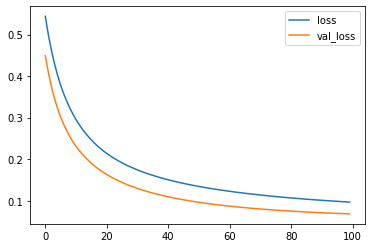

In [14]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

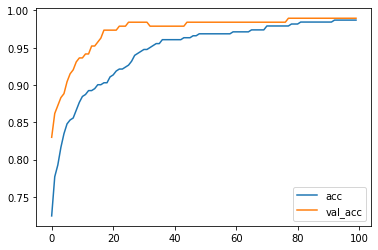

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Part 2: Making Predictions

This goes with the lecture "Making Predictions"

In [16]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[2.1021210e-02]
 [2.0729139e-07]
 [2.2806821e-03]
 [9.9261028e-01]
 [3.0642800e-06]
 [8.8806683e-01]
 [1.2656253e-04]
 [4.7297902e-11]
 [5.5490177e-02]
 [9.9726307e-01]
 [9.5349371e-01]
 [9.8387885e-01]
 [9.4542706e-01]
 [5.8247353e-04]
 [7.4922830e-01]
 [1.2460927e-02]
 [9.9990392e-01]
 [9.9202991e-01]
 [9.5699263e-01]
 [3.3521660e-02]
 [9.9870896e-01]
 [9.6243471e-01]
 [8.4085035e-01]
 [9.9662220e-01]
 [7.6698292e-05]
 [9.8064601e-01]
 [3.1272130e-08]
 [9.9626487e-01]
 [8.3684677e-09]
 [9.1745061e-01]
 [1.1133600e-03]
 [9.1087872e-01]
 [9.4356912e-01]
 [9.3720698e-01]
 [9.6539438e-01]
 [9.7941381e-01]
 [7.5389817e-06]
 [9.8992085e-01]
 [9.8996162e-01]
 [9.8886883e-01]
 [9.9604636e-01]
 [3.0536623e-07]
 [9.7004211e-01]
 [9.8497367e-01]
 [7.9617398e-03]
 [9.4617260e-01]
 [1.3199382e-03]
 [9.8677105e-01]
 [9.6428972e-01]
 [9.5211440e-01]
 [9.7179347e-01]
 [1.4430468e-02]
 [9.9717122e-01]
 [9.4046170e-01]
 [3.6129528e-01]
 [3.4751000e-03]
 [9.9024349e-01]
 [3.6377455e-03]
 [9.8861235e-0

In [17]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.]


In [18]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9894
Evaluate output: [0.06818309426307678, 0.9893617033958435]


# Part 3: Saving and Loading a Model

This goes with the lecture "Saving and Loading a Model"

In [19]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [20]:
# Check that the model file exists
!ls -lh 

total 24K
-rw-r--r-- 1 root root  19K Oct 26 10:39 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 14 16:31 sample_data


In [21]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9894


[0.06818309426307678, 0.9893617033958435]

In [22]:

# Download the file - requires Chrome (at this point)
# from google.colab import files
# files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>